# Medical Cost Insurance Prediction


#### Soumydip Shil 1906285
#### Abhigyan Sinha 1906602
#### Syed Asif Akhtar 1906663
#### Anuj 1906668

 ###    Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Store the dataset into the Dataframe

In [2]:
df = pd.read_csv('./insurance_steps - Copylast.csv')
df.head(10)

,age,sex,bmi,steps,children,smoker,region,charges,blood pressure,diabetes,HistoryOfCancer,MajorSurgeries
0,19,female,27.900,3009,0,yes,South West,16884.92400,no,no,no,0
1,18,male,33.770,3008,1,no,South East,1725.55230,no,no,no,0
2,28,male,33.000,3009,3,no,South East,4449.46200,yes,yes,no,1
3,33,male,22.705,10009,0,no,North West,21984.47061,yes,yes,no,2
4,32,male,28.880,8010,0,no,North West,3866.85520,no,yes,no,1
5,31,female,25.740,8005,0,no,South East,3756.62160,no,no,no,1
6,46,female,33.440,3002,1,no,South East,8240.58960,no,no,no,0
7,37,female,27.740,8007,3,no,North West,7281.50560,no,no,no,0
8,37,male,29.830,8002,2,no,North East,6406.41070,no,no,no,0
9,60,female,25.840,5008,0,no,North West,28923.13692,no,yes,no,0


### Check the shape of the dataframe

In [3]:
df.shape

(1338, 12)

###  Check the Detail information of the dataframe


In [4]:
df.shape

(1338, 12)

In [5]:
 print (df.columns)

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'blood pressure', 'diabetes', 'HistoryOfCancer', 'MajorSurgeries'],
      dtype='object')


In [6]:
df.describe()

,age,bmi,steps,children,charges,MajorSurgeries
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,1.094918,13270.422265,0.677130
std,14.049960,6.098187,2453.643236,1.205493,12110.011237,0.753213
min,18.000000,15.960000,3000.000000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,3008.000000,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,4007.000000,1.000000,9382.033000,1.000000
75%,51.000000,34.693750,8004.000000,2.000000,16639.912515,1.000000
max,64.000000,53.130000,10010.000000,5.000000,63770.428010,3.000000


In [7]:
df.dtypes

age                  int64
sex                 object
bmi                float64
steps                int64
children             int64
smoker              object
region              object
charges            float64
blood pressure      object
diabetes            object
HistoryOfCancer     object
MajorSurgeries       int64
dtype: object

# Data Cleaning

###  Display the Null values percentage against every columns (compare to the total number of records)

In [8]:
df.head(5)

,age,sex,bmi,steps,children,smoker,region,charges,blood pressure,diabetes,HistoryOfCancer,MajorSurgeries
0,19,female,27.900,3009,0,yes,South West,16884.92400,no,no,no,0
1,18,male,33.770,3008,1,no,South East,1725.55230,no,no,no,0
2,28,male,33.000,3009,3,no,South East,4449.46200,yes,yes,no,1
3,33,male,22.705,10009,0,no,North West,21984.47061,yes,yes,no,2
4,32,male,28.880,8010,0,no,North West,3866.85520,no,yes,no,1


In [9]:
df.isnull().mean() * 100

age                0.0
sex                0.0
bmi                0.0
steps              0.0
children           0.0
smoker             0.0
region             0.0
charges            0.0
blood pressure     0.0
diabetes           0.0
HistoryOfCancer    0.0
MajorSurgeries     0.0
dtype: float64

<AxesSubplot:>

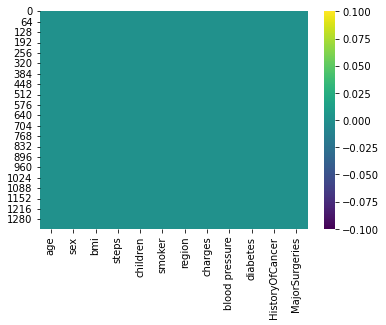

In [10]:
sns.heatmap(df.isnull(), cmap='viridis')

There are no missing values as such.

### Show all the Duplicate rows from the dataframe

In [11]:
duplicate_data = df[df.duplicated()]
duplicate_data

,age,sex,bmi,steps,children,smoker,region,charges,blood pressure,diabetes,HistoryOfCancer,MajorSurgeries


In [12]:
df.duplicated().sum()

0

### Drop all the Duplicate Rows

In [13]:
df = df.drop_duplicates()
df

,age,sex,bmi,steps,children,smoker,region,charges,blood pressure,diabetes,HistoryOfCancer,MajorSurgeries
0,19,female,27.900,3009,0,yes,South West,16884.92400,no,no,no,0
1,18,male,33.770,3008,1,no,South East,1725.55230,no,no,no,0
2,28,male,33.000,3009,3,no,South East,4449.46200,yes,yes,no,1
3,33,male,22.705,10009,0,no,North West,21984.47061,yes,yes,no,2
4,32,male,28.880,8010,0,no,North West,3866.85520,no,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,4008,3,no,North West,10600.54830,no,yes,no,0
1334,18,female,31.920,3003,0,no,North East,2205.98080,yes,yes,no,1
1335,18,female,36.850,3008,0,no,South East,1629.83350,yes,no,no,2
1336,21,female,25.800,8009,0,no,South West,2007.94500,no,no,no,0


### Now check for all duplicate rows now


In [14]:
df.duplicated().sum()

0

## Data Pre-processing

### Converting Categorical Features to Numerical

In [15]:
clean_data = {'sex': {'male' : 1 , 'female' : 0} ,
              'smoker': {'no': 0 , 'yes' : 1},
              'region' : {'North West':1, 'North East':0,'South East':2,'South West':3},
              'blood pressure' : { 'no' : 0 , 'yes' : 1},
              'diabetes' : {'no' : 0 , 'yes' : 1},
              'HistoryOfCancer' : {'no' : 0 , 'yes' : 1}
               }
df_copy = df.copy()
df_copy.replace(clean_data, inplace=True)

In [16]:
df_copy.describe()

,age,sex,bmi,steps,children,smoker,region,charges,blood pressure,diabetes,HistoryOfCancer,MajorSurgeries
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.493274,0.424514,0.118834,0.677130
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.500142,0.494454,0.323714,0.753213
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000,1.000000,0.000000,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000,1.000000,1.000000,3.000000


In [17]:
df_copy

,age,sex,bmi,steps,children,smoker,region,charges,blood pressure,diabetes,HistoryOfCancer,MajorSurgeries
0,19,0,27.900,3009,0,1,3,16884.92400,0,0,0,0
1,18,1,33.770,3008,1,0,2,1725.55230,0,0,0,0
2,28,1,33.000,3009,3,0,2,4449.46200,1,1,0,1
3,33,1,22.705,10009,0,0,1,21984.47061,1,1,0,2
4,32,1,28.880,8010,0,0,1,3866.85520,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0,1,0,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1,1,0,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1,0,0,2
1336,21,0,25.800,8009,0,0,3,2007.94500,0,0,0,0


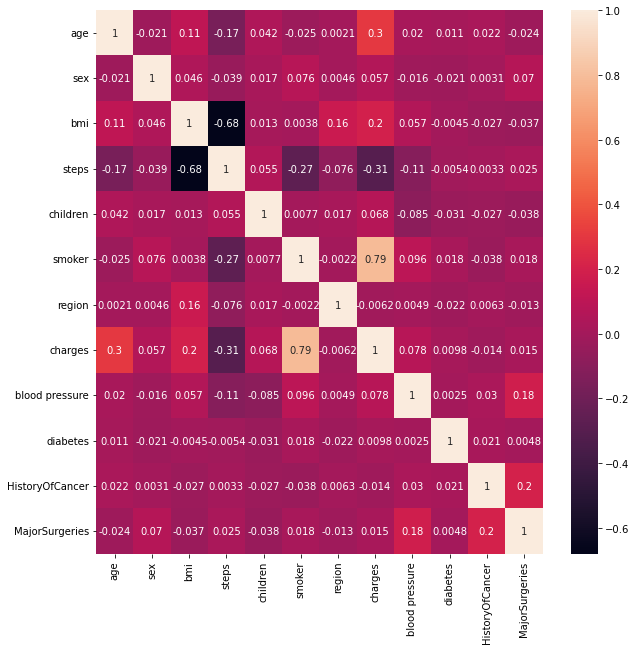

In [18]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_copy.corr(), annot=True)

 There are no other values in above pre-preocessed column Now we can proceed with EDA

# Exploratory Data Analysis (EDA) 

### Lets see how the charges are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

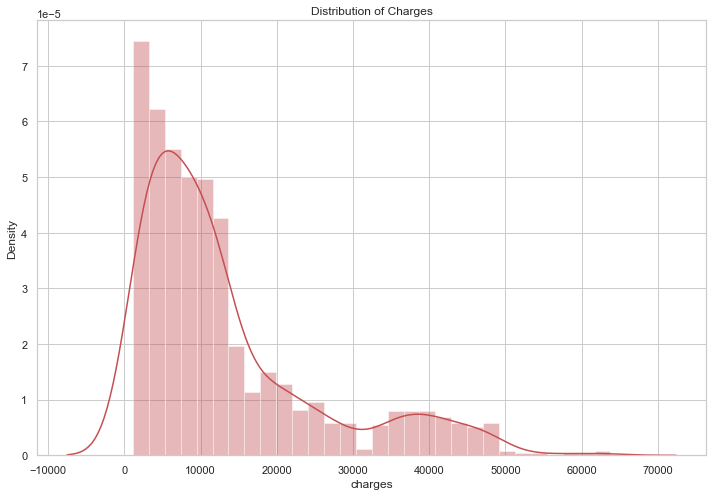

In [19]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'r')
plt.title('Distribution of Charges')

### Now let's look at the charges by Age

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

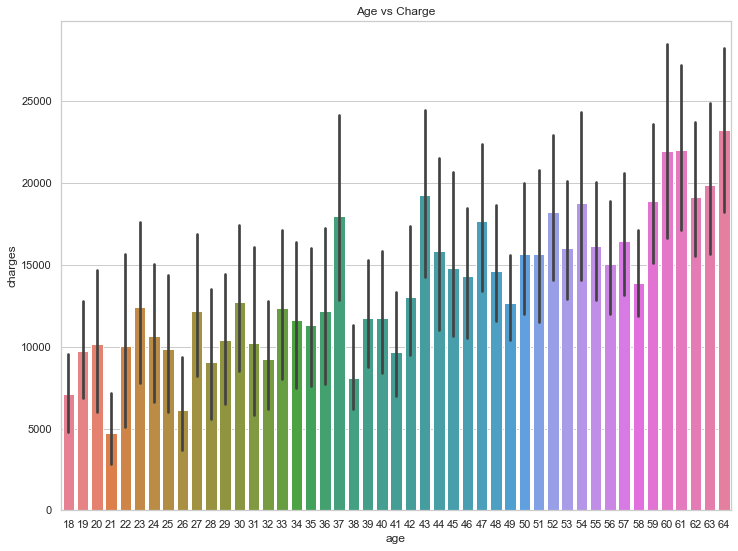

In [20]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df_copy,palette='husl')
#plt.savefig('./sampleImages/AgevsCharges')

### Now let's look at the charges by Region

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

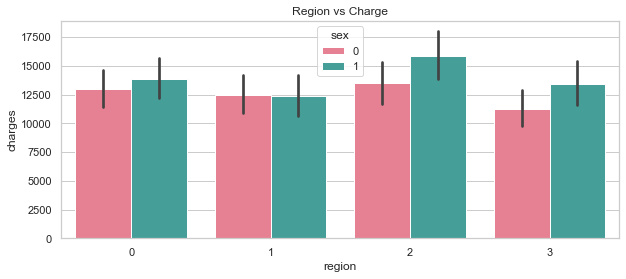

In [21]:
plt.figure(figsize=(10,4))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df_copy,palette='husl',hue='sex')

### Now let's look at the charges by Smoker

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

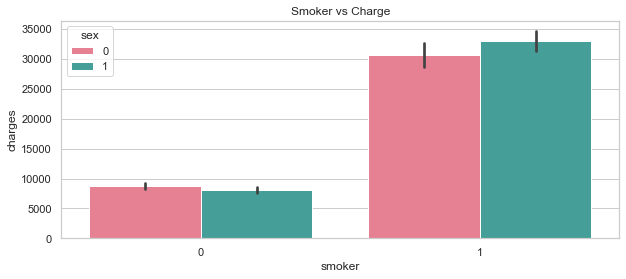

In [22]:
plt.figure(figsize=(10,4))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df_copy,palette='husl',hue='sex')

### Now let's look at the charges by Sex

<AxesSubplot:title={'center':'Sex vs Charge'}, xlabel='sex', ylabel='charges'>

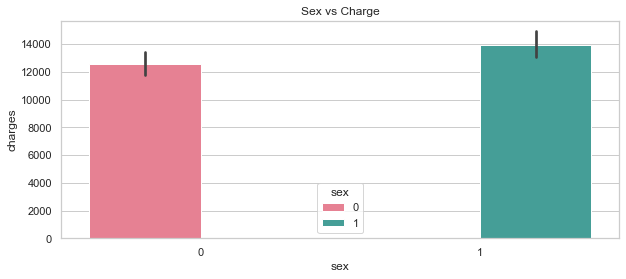

In [23]:
plt.figure(figsize=(10,4))
plt.title('Sex vs Charge')
sns.barplot(x='sex',y='charges',data=df_copy,palette='husl',hue='sex')

### Now let's look at the charges by Children

<AxesSubplot:title={'center':'Children vs Charge'}, xlabel='children', ylabel='charges'>

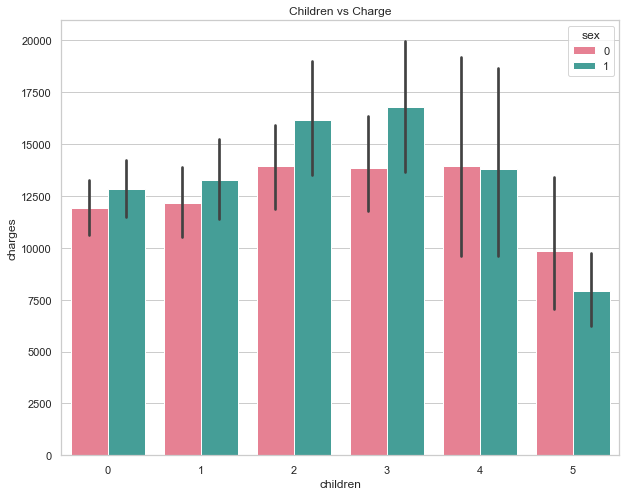

In [24]:
plt.figure(figsize=(10,8))
plt.title('Children vs Charge')
sns.barplot(x='children',y='charges',data=df_copy,palette='husl',hue ='sex')

### Now let's look at the charges by BMI

Text(0.5, 1.0, 'BMI VS Charge')

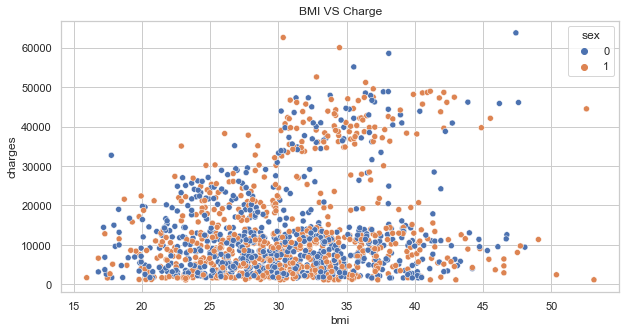

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df_copy)
plt.title('BMI VS Charge')

### Let's look at the  medical charges by region according to smoker  

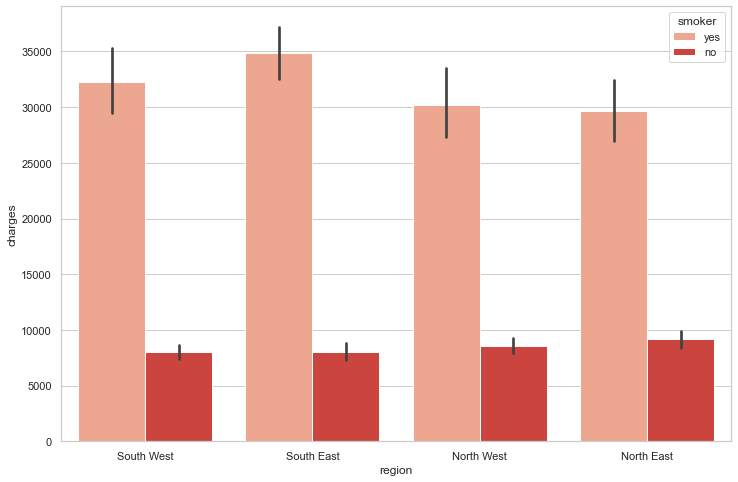

In [26]:
f, a = plt.subplots(1, 1, figsize=(12, 8))
a = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds')

### Let's see medical charges by regian according to children

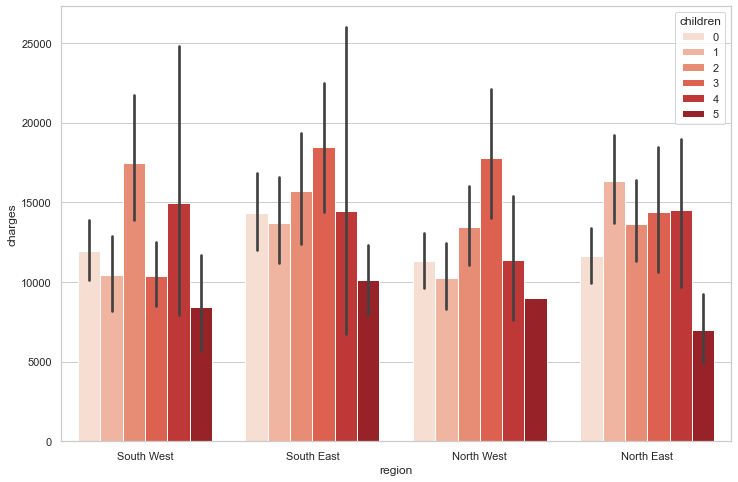

In [27]:
f, a = plt.subplots(1, 1, figsize=(12, 8))
a = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Reds')

### summary
As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.

###  let's analyze the medical charges by age, Bmi and children according to the smoking factor



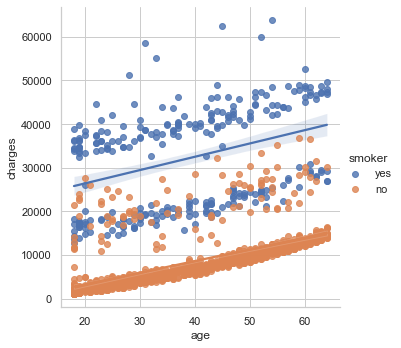

In [28]:
a = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')

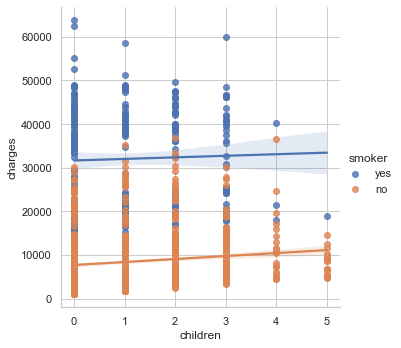

In [29]:
a = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')

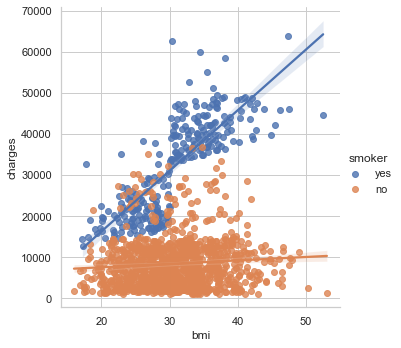

In [30]:
a = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')


Smoking has the highest impact on medical costs, even though the costs are growing with age, Bmi and children.

### Get Overall Statistics About The Dataset

In [31]:
df.dtypes

age                  int64
sex                 object
bmi                float64
steps                int64
children             int64
smoker              object
region              object
charges            float64
blood pressure      object
diabetes            object
HistoryOfCancer     object
MajorSurgeries       int64
dtype: object

# Splitting of Train and the Test Data

### You need to split the "charges" columns into X and y dataframe

In [32]:
y = df_copy[["charges"]].copy()
y.shape

(1338, 1)

In [33]:
X = df_copy.drop(['charges'],axis=1).values
y = df_copy['charges'].values.reshape(-1,1)

In [34]:
X.shape

(1338, 11)

In [35]:
y.shape

(1338, 1)

### WE are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_loc_test,y_train,y_loc_test=train_test_split(X,y,test_size=.40,random_state=0,shuffle=False)

### Check for the number of rows and columns of all the 4 dataframes  

In [37]:
X_train.shape

(802, 11)

In [38]:
y_train.shape

(802, 1)

In [39]:
X_loc_test.shape

(536, 11)

In [40]:
y_loc_test.shape

(536, 1)

### Now We are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [41]:
from sklearn.model_selection import train_test_split
X_val,X_test,y_val,y_test=train_test_split(X_loc_test,y_loc_test,test_size=.50,random_state=0,shuffle=False)

### Check for the number of rows and columns of all the 4 dataframes 

In [42]:
X_val.shape

(268, 11)

In [43]:
y_val.shape

(268, 1)

In [44]:
X_test.shape

(268, 11)

In [45]:
y_test.shape

(268, 1)

# Modelling 

#### We need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### We need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [46]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
predicted= regressor1.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [48]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [49]:
predict_test = regressor1.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

6142.94295777593

### Display The Comparison Lists

In [50]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[35322318.764738075],[0.7705269281530479],

# Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regression')
regressor2 = DecisionTreeRegressor()
regressor2.fit(X_train, y_train)
predicted= regressor2.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [52]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [53]:
predict_test = regressor2.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

7242.230225495959

### Display The Comparison Lists

In [54]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Decision Tree Regression'],[35322318.764738075, 46807497.75067929],[0.7705269281530479, 0.6959129335234817],

# Random Forest Regression

In [55]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regression')
regressor3 = RandomForestRegressor()
regressor3.fit(X_train,y_train)
predicted=regressor3.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [56]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [57]:
predict_test = regressor3.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

5168.564765969429

### Display The Comparison Lists

In [58]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Decision Tree Regression', 'Random Forest Regression'],[35322318.764738075, 46807497.75067929, 22639935.0103225],[0.7705269281530479, 0.6959129335234817, 0.8529186187397064],

# Support Vector Regression

In [59]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
regressor4 = SVR()
regressor4.fit(X_train, y_train)
predicted= regressor4.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [60]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [61]:
predict_test = regressor4.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

12788.045308000543

### Display The Comparison Lists

In [62]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Decision Tree Regression', 'Random Forest Regression', 'Support Vector Regression'],[35322318.764738075, 46807497.75067929, 22639935.0103225, 170392171.9219984],[0.7705269281530479, 0.6959129335234817, 0.8529186187397064, -0.10696059819970016],

# Extreme Gradient Boost Regression

In [63]:
import xgboost as xgb
Algorithm.append('Extreme Gradient Boost Regression')
regressor5 = xgb.XGBRegressor()
regressor5.fit(X_train, y_train)
predicted = regressor5.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test = regressor5.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

### We need to make the comparison list into a comparison dataframe 

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

we know that which model's R2_score is greater and MSE_score is lower , it is the best fit model as compare to other ML models .so here ,it is "RandomForestRegressor" model.

 ### Now from the Comparison table,we need to choose the best fit model


In [ ]:
regressorfinal = RandomForestRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val, predict_testfinal, squared=False)

### Calculate the R2 score for test

In [ ]:
r2_score(y_test,predictedfinal)

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val, predict_testfinal)

### Calculate the Accuracy for train Dataset 

In [ ]:
regressorfinal.score(X_train , y_train)

### Calculate the accuracy for validation

In [ ]:
regressorfinal.score(X_val , y_val)

### Calculate the accuracy for test

In [ ]:
regressorfinal.score(X_test , y_test)

### Predict Charges For New Customer 

In [ ]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'steps' : 1278,
        'children' : 4,
        'smoker' : 1,
        'region' : 2,
       'blood pressure': 1 , 
       'diabetes' : 1,
       'HistoryOfCancer' : 1 , 
       'MajorSurgeries' : 1}

In [ ]:
df = pd.DataFrame(data,index=[0])
df

In [ ]:
n_predict = regressor3.predict(df)
print("New Customer's Medical Insurance Charges  : ",n_predict[0])

From above we found that RandomForestRegressor is the best model for this dataset. 

###  Predict Charges For New Customer with different values

In [ ]:
data1 = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'steps' : 1278,
        'children' : 4,
        'smoker' : 1,
        'region' : 2,
       'blood pressure': 0,
         'diabetes' :0,
         'HistoryOfCancer' : 0, 
       'MajorSurgeries' : 0}

In [ ]:
df_1 = pd.DataFrame(data1,index=[0])
df_1

In [ ]:
n_predict = regressor3.predict(df_1)
print("New Customer's Medical Insurance Charges  : ",n_predict[0])

In [ ]:
data1 = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'steps' : 1278,
        'children' : 4,
        'smoker' : 0,
        'region' : 2,
       'blood pressure': 0,
         'diabetes' :0,
         'HistoryOfCancer' : 0, 
       'MajorSurgeries' : 0}

In [ ]:
df_2 = pd.DataFrame(data1,index=[0])
df_2

In [ ]:
n_predict = regressor3.predict(df_2)
print("New Customer's Medical Insurance Charges  : ",n_predict[0])

In [ ]:
data1 = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'steps' : 1278,
        'children' : 4,
        'smoker' : 0,
        'region' : 2,
       'blood pressure': 1,
         'diabetes' :1,
         'HistoryOfCancer' : 1, 
       'MajorSurgeries' : 1}

In [ ]:
df_2 = pd.DataFrame(data1,index=[0])
df_2

we clearly see that in yhe second case , the New Customer's Medical Insurance Charges are LOW . because here the  'blood pressure' 'diabetes' 'HistoryOfCancer' 'MajorSurgeries'  are ZERO . so this person's Charges is low as compare to previous person's charges.(previes person's have all disease in '1'. )

## Let's train our model on the entire dataset. 

In [ ]:
regressor3 = RandomForestRegressor()
regressor3.fit(X,y)

In [ ]:
import joblib

In [ ]:
joblib.dump(regressor3 , 'moddel_joblib')

In [ ]:
model = joblib.load('moddel_joblib')

In [ ]:
model.predict(df)

In [ ]:
model.predict(df_1)